tensor([[-0.1629],
        [-0.1264]], grad_fn=<AddmmBackward0>)
linear_hidden_layer.weight Parameter containing:
tensor([[ 0.3416,  0.2564, -0.5215],
        [-0.0472,  0.0350,  0.0594]], requires_grad=True)
linear_hidden_layer.bias Parameter containing:
tensor([-0.5444,  0.0678], requires_grad=True)
linear_output_layer.weight Parameter containing:
tensor([[-0.3039,  0.5994]], requires_grad=True)
linear_output_layer.bias Parameter containing:
tensor([-0.3131], requires_grad=True)


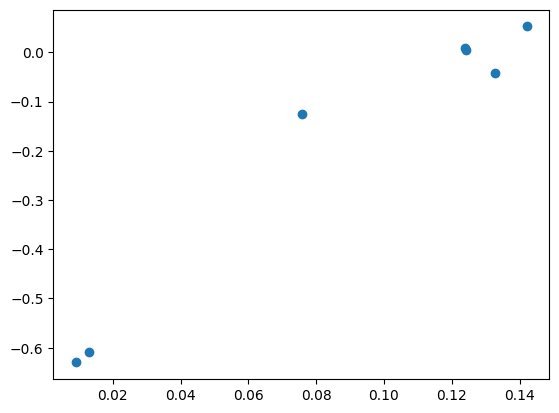

epoch: 0, loss is: nan
epoch: 500, loss is: nan
epoch: 1000, loss is: nan
epoch: 1500, loss is: nan
epoch: 2000, loss is: nan
epoch: 2500, loss is: nan
epoch: 3000, loss is: nan
epoch: 3500, loss is: nan
epoch: 4000, loss is: nan
epoch: 4500, loss is: nan
epoch: 5000, loss is: nan
epoch: 5500, loss is: nan
epoch: 6000, loss is: nan
epoch: 6500, loss is: nan
epoch: 7000, loss is: nan
epoch: 7500, loss is: nan
epoch: 8000, loss is: nan
epoch: 8500, loss is: nan
epoch: 9000, loss is: nan
epoch: 9500, loss is: nan
epoch: 10000, loss is: nan
epoch: 10500, loss is: nan
epoch: 11000, loss is: nan
epoch: 11500, loss is: nan
epoch: 12000, loss is: nan
epoch: 12500, loss is: nan
epoch: 13000, loss is: nan
epoch: 13500, loss is: nan
epoch: 14000, loss is: nan
epoch: 14500, loss is: nan
epoch: 15000, loss is: nan
epoch: 15500, loss is: nan
epoch: 16000, loss is: nan
epoch: 16500, loss is: nan
epoch: 17000, loss is: nan
epoch: 17500, loss is: nan
epoch: 18000, loss is: nan
epoch: 18500, loss is: na

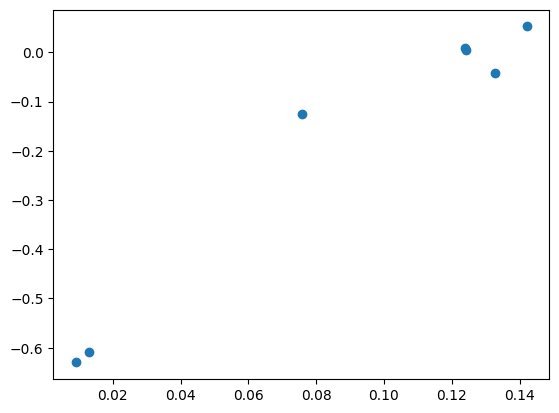

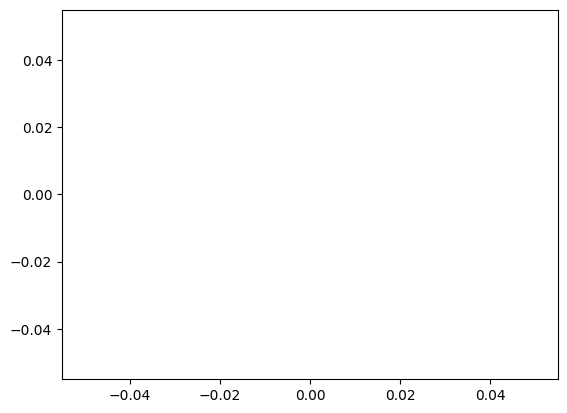

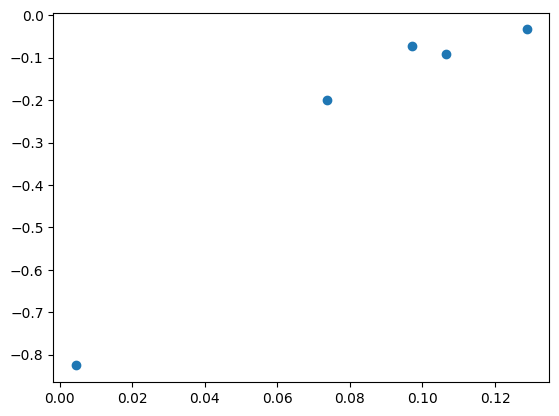

测试集上MSE损失值:nan
linear_hidden_layer.weight Parameter containing:
tensor([[nan],
        [nan],
        [nan]], requires_grad=True)
linear_hidden_layer.bias Parameter containing:
tensor([nan, nan, nan], requires_grad=True)
linear_output_layer.weight Parameter containing:
tensor([[nan, nan, nan]], requires_grad=True)
linear_output_layer.bias Parameter containing:
tensor([nan], requires_grad=True)


In [1]:
from math import log
# %load 第13周第1次-MLPRegression-new.py
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

class MLPRegression(nn.Module):
    def __init__(self, input_dim, hidden_dim): #构造函数，需要调用nn.Mudule的构造函数
        super().__init__()       #等价于nn.Module.__init__()
        self.linear_hidden_layer = nn.Linear(input_dim, hidden_dim, bias=True)
        self.linear_output_layer = nn.Linear(hidden_dim, 1, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        hidden_layer_output = self.sigmoid(self.linear_hidden_layer(x))
        #output = self.sigmoid(self.linear_output_layer(hidden_layer_output))
        output = self.linear_output_layer(hidden_layer_output)
        return output


class MLP_Model():
    def __init__(self, input_dim, lr=0.01, epoches=10000, hidden_dim=3):
        """
        创建模型和优化器，初始化线性模型和优化器超参数
        """       
        # 模型超参数
        self.learning_rate = lr
        self.epoches = epoches
        self.hidden_dim = hidden_dim

        # 模型
        self.model = MLPRegression(input_dim, self.hidden_dim)
        # 优化器
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)
        # 损失函数
        self.loss_function = torch.nn.MSELoss()
    
    def train(self, x, y):
        """
        训练模型
        输入:
            x: 训练数据
            y: 回归真值
        返回: 
            losses: 所有迭代中损失函数值
        """
        losses = []
        for epoch in range(self.epoches):
            prediction = self.model(x)
            loss = self.loss_function(prediction, y)           

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            losses.append(loss.item())

            if epoch % 500 == 0:
                print("epoch: {}, loss is: {}".format(epoch, loss.item()))

        if x.shape[1]==1:
            plt.figure()
            plt.scatter(x.data, y.data)
            plt.scatter(x.data, prediction.data, color="r")
            plt.show()

        return losses
        
    def test(self, x, y, if_plot = True):
        """
        用训练好的模型做测试
        输入:
            x: 测试数据
            y: 测试数据的回归真值
        返回:
            prediction: 测试数据的预测值
        """
        prediction = self.model(x)
        testMSE = self.loss_function(prediction, y)
        
        if if_plot and x.shape[1]==1:
            plt.figure()
            plt.scatter(x.data, y.data)
            plt.scatter(x.data, prediction.data, color="r")
            plt.show()

        return prediction, testMSE

def testMLPRegressionModel(in_dim, hidden_dim=2, data_size=2):
    layer = MLPRegression(in_dim, hidden_dim)
    input=torch.randn(data_size,in_dim)
    output=layer(input)  #前向传播 执行forward()
    print(output)
    for name, parameter in layer.named_parameters():
        print(name, parameter)

testMLPRegressionModel(3)

def create_linear_data(data_size, input_dim, if_plot=True):
    """
    为线性模型生成数据
    输入:
        data_size: 样本数量
        input_dim: 输入维度（特征数）
    返回:
        x_train: 训练数据
        y_train: 训练数据回归真值
        x_test: 测试数据
        y_test: 测试数据回归真值
    """
    # 固定随机数生成器种子，保证每次运行结果一致
    np.random.seed(1125)
    torch.manual_seed(1125)
    torch.cuda.manual_seed(1125)

    # 生成随机数据
    x = torch.log(torch.rand(data_size, in_dim)) + 0.15
    random_error = 0.1 * torch.rand(data_size, 1) - 0.05
    y = 0.25 * torch.sum(torch.log(x), dim=1, keepdim=True) + 0.5 + random_error

    # 划分训练集与测试集
    shuffled_index = np.random.permutation(data_size)
    shuffled_index = torch.from_numpy(shuffled_index).long()
    x = x[shuffled_index]
    y = y[shuffled_index]
    split_index = int(data_size * 0.7)
    x_train = x[:split_index]     # 训练集 x
    y_train = y[:split_index]     # 训练集 y
    x_test = x[split_index:]      # 测试集 x
    y_test = y[split_index:]      # 测试集 y
    
    if if_plot and input_dim == 1:
        plt.figure()
        plt.scatter(x_train.numpy(),y_train.numpy())
        plt.show()
    return x_train, y_train, x_test, y_test

# 生成数据
data_size = 100
in_dim = 1
x_train, y_train, x_test, y_test = create_linear_data(data_size, in_dim, if_plot=True)
# 线性回归模型实例化
MLP = MLP_Model(in_dim, lr=0.1, epoches=20000, hidden_dim=3)
# 模型训练
losses = MLP.train(x_train, y_train)

# 画图
plt.figure()
plt.scatter(np.arange(len(losses)), losses, marker='o', c='green')
# plt.savefig('loss.jpg')   # 保存图片
plt.show()
# 模型测试
prediction, testMSE = MLP.test(x_test, y_test)
print('测试集上MSE损失值:{}'.format(testMSE))

for name,parameter in MLP.model.named_parameters():
    print(name, parameter)